In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
student_data = pd.read_csv("data2020.student.csv")
prediction_data = pd.read_csv("predict.sample.csv")

In [24]:
student_data.tail()

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
1095,1096,NaN,24.0,2.0,V3,4,V4,24,V0,1596,...,V3,2,V6,46252,V4,NaN,NaN,1596,V1,V3
1096,1097,NaN,41.0,1.0,V4,3,V1,41,V4,7174,...,V2,1,V3,22782,V2,NaN,NaN,7174,V2,V2
1097,1098,NaN,36.0,2.0,V4,1,V2,36,V0,2272,...,V2,2,V6,14115,V2,NaN,NaN,2272,V1,V3
1098,1099,NaN,9.0,2.0,V1,2,V4,9,V1,2848,...,V2,1,V1,58455,V2,NaN,NaN,2848,V1,V3
1099,1100,NaN,23.0,1.0,V2,4,V1,23,V0,2957,...,V2,2,V1,46305,V4,NaN,NaN,2957,V2,V3


In [25]:
student_data.Class.unique()

array([ 0.,  1., nan])

In [26]:
prediction_data[:5]

,ID,Predict 1,Predict 2
0,1001,1,0
1,1002,0,1
2,1003,1,0
3,1004,0,1
4,1005,1,0


In [27]:
student_data.columns 

Index(['ID', 'Class', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C30', 'C31', 'C32'],
      dtype='object')

In [28]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1100 non-null   int64  
 1   Class   1000 non-null   float64
 2   C1      1093 non-null   float64
 3   C2      1094 non-null   float64
 4   C3      1100 non-null   object 
 5   C4      1100 non-null   int64  
 6   C5      1100 non-null   object 
 7   C6      1100 non-null   int64  
 8   C7      1100 non-null   object 
 9   C8      1100 non-null   int64  
 10  C9      1100 non-null   int64  
 11  C10     1100 non-null   object 
 12  C11     1100 non-null   object 
 13  C12     1100 non-null   object 
 14  C13     1100 non-null   int64  
 15  C14     1094 non-null   object 
 16  C15     1100 non-null   int64  
 17  C16     1100 non-null   object 
 18  C17     1100 non-null   object 
 19  C18     1100 non-null   object 
 20  C19     1093 non-null   object 
 21  C20     1100 non-null   int64  
 22  

In [29]:
student_data[student_data.isna().any(axis=1)]

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,1,0.0,3.0,2.0,V1,3,V4,3,V0,600,...,V1,1,V2,45912,V2,NaN,NaN,600,V1,V2
1,2,1.0,20.0,1.0,V2,4,V4,20,V4,5003,...,V2,2,V0,24738,V5,NaN,NaN,5003,V2,V2
2,3,0.0,11.0,1.0,V4,3,V3,11,V4,3398,...,V2,1,V3,33726,V2,NaN,NaN,3398,V1,V3
3,4,0.0,10.0,2.0,V3,2,V4,10,V2,1597,...,V1,1,V0,4466,V2,NaN,NaN,1597,V1,V3
4,5,0.0,15.0,1.0,V4,2,V4,15,V4,1978,...,V2,1,V3,35051,V2,NaN,NaN,1978,V1,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24.0,2.0,V3,4,V4,24,V0,1596,...,V3,2,V6,46252,V4,NaN,NaN,1596,V1,V3
1096,1097,NaN,41.0,1.0,V4,3,V1,41,V4,7174,...,V2,1,V3,22782,V2,NaN,NaN,7174,V2,V2
1097,1098,NaN,36.0,2.0,V4,1,V2,36,V0,2272,...,V2,2,V6,14115,V2,NaN,NaN,2272,V1,V3
1098,1099,NaN,9.0,2.0,V1,2,V4,9,V1,2848,...,V2,1,V1,58455,V2,NaN,NaN,2848,V1,V3


In [30]:
nms = student_data.dropna(thresh=2)
nms[nms.C28.notnull()]

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
69,70,0.0,5.0,2.0,V3,4,V4,5,V1,1345,...,V3,1,V3,36832,V2,1.0,NaN,1345,V2,V3
77,78,0.0,9.0,1.0,V1,4,V4,9,V0,1235,...,V1,1,V4,19322,V2,3.0,NaN,1235,V2,V2
691,692,0.0,36.0,1.0,V4,2,V4,36,V4,11053,...,V2,1,V1,38581,V4,4.0,NaN,11053,V2,V3
908,909,0.0,9.0,1.0,V1,4,V4,9,V0,1235,...,V1,1,V4,19322,V2,3.0,NaN,1235,V2,V2
966,967,0.0,5.0,2.0,V3,4,V4,5,V1,1345,...,V3,1,V3,36832,V2,1.0,NaN,1345,V2,V3
1004,1005,NaN,5.0,1.0,V1,4,V1,5,V3,666,...,V2,2,V0,26904,V4,2.0,NaN,666,V2,V2
1010,1011,NaN,12.0,1.0,V1,4,V4,12,V4,996,...,V2,2,V5,26884,V4,5.0,NaN,996,V1,V2


In [31]:
nms = student_data.dropna(thresh=2)
nms[nms.C29.notnull()]

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
192,193,0.0,6.0,1.0,V1,4,V4,6,V0,671,...,V2,1,V0,14591,V2,NaN,V3,671,V2,V2
260,261,1.0,24.0,1.0,V2,1,V1,24,V0,3123,...,V2,1,V0,7425,V2,NaN,V2,3123,V1,V2
306,307,0.0,18.0,1.0,V1,4,V4,18,V0,1473,...,V2,1,V3,116238,V2,NaN,V1,1473,V2,V4
376,377,0.0,9.0,1.0,V4,2,V4,9,V2,936,...,V2,2,V6,19957,V4,NaN,V2,936,V2,V3
1063,1064,NaN,23.0,1.0,V1,4,V4,23,V1,1468,...,V1,1,V0,51437,V2,NaN,V1,1468,V1,V4


In [32]:
student_data.drop(['C28','C29'], axis=1, inplace =True)

In [33]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1100 non-null   int64  
 1   Class   1000 non-null   float64
 2   C1      1093 non-null   float64
 3   C2      1094 non-null   float64
 4   C3      1100 non-null   object 
 5   C4      1100 non-null   int64  
 6   C5      1100 non-null   object 
 7   C6      1100 non-null   int64  
 8   C7      1100 non-null   object 
 9   C8      1100 non-null   int64  
 10  C9      1100 non-null   int64  
 11  C10     1100 non-null   object 
 12  C11     1100 non-null   object 
 13  C12     1100 non-null   object 
 14  C13     1100 non-null   int64  
 15  C14     1094 non-null   object 
 16  C15     1100 non-null   int64  
 17  C16     1100 non-null   object 
 18  C17     1100 non-null   object 
 19  C18     1100 non-null   object 
 20  C19     1093 non-null   object 
 21  C20     1100 non-null   int64  
 22  

In [34]:
student_data.dropna(inplace= True)

In [35]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      982 non-null    int64  
 1   Class   982 non-null    float64
 2   C1      982 non-null    float64
 3   C2      982 non-null    float64
 4   C3      982 non-null    object 
 5   C4      982 non-null    int64  
 6   C5      982 non-null    object 
 7   C6      982 non-null    int64  
 8   C7      982 non-null    object 
 9   C8      982 non-null    int64  
 10  C9      982 non-null    int64  
 11  C10     982 non-null    object 
 12  C11     982 non-null    object 
 13  C12     982 non-null    object 
 14  C13     982 non-null    int64  
 15  C14     982 non-null    object 
 16  C15     982 non-null    int64  
 17  C16     982 non-null    object 
 18  C17     982 non-null    object 
 19  C18     982 non-null    object 
 20  C19     982 non-null    object 
 21  C20     982 non-null    int64  
 22  C2

In [36]:
student_data[['C10', 'C11', 'C12', 'C14', 'C16', 'C17', 'C18', 'C19']]

,C10,C11,C12,C14,C16,C17,C18,C19
0,V2,V1,yes,V3,V4,F,V2,V2
1,V3,V1,yes,V1,V4,F,V5,V3
2,V4,V1,yes,V3,V3,F,V2,V5
3,V2,V1,no,V3,V4,F,V2,V3
4,V3,V1,yes,V3,V4,F,V2,V5
...,...,...,...,...,...,...,...,...
995,V3,V1,yes,V3,V1,F,V4,V5
996,V3,V1,yes,V3,V2,F,V2,V4
997,V4,V1,yes,V3,V3,F,V2,V5
998,V3,V1,yes,V3,V4,F,V4,V4


In [37]:
student_data.head()

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C30,C31,C32
0,1,0.0,3.0,2.0,V1,3,V4,3,V0,600,...,T,0,V1,1,V2,45912,V2,600,V1,V2
1,2,1.0,20.0,1.0,V2,4,V4,20,V4,5003,...,T,0,V2,2,V0,24738,V5,5003,V2,V2
2,3,0.0,11.0,1.0,V4,3,V3,11,V4,3398,...,T,0,V2,1,V3,33726,V2,3398,V1,V3
3,4,0.0,10.0,2.0,V3,2,V4,10,V2,1597,...,T,0,V1,1,V0,4466,V2,1597,V1,V3
4,5,0.0,15.0,1.0,V4,2,V4,15,V4,1978,...,T,0,V2,1,V3,35051,V2,1978,V1,V3


In [38]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
student_data["C3"] = lb_make.fit_transform(student_data["C3"])
student_data["C5"] = lb_make.fit_transform(student_data["C5"])
student_data["C7"] = lb_make.fit_transform(student_data["C7"])

student_data["C10"] = lb_make.fit_transform(student_data["C10"])
student_data["C11"] = lb_make.fit_transform(student_data["C11"])
student_data["C12"] = lb_make.fit_transform(student_data["C12"])
student_data["C14"] = lb_make.fit_transform(student_data["C14"])
student_data["C16"] = lb_make.fit_transform(student_data["C16"])
student_data["C17"] = lb_make.fit_transform(student_data["C17"])
student_data["C18"] = lb_make.fit_transform(student_data["C18"])
student_data["C19"] = lb_make.fit_transform(student_data["C19"])

student_data["C21"] = lb_make.fit_transform(student_data["C21"])
student_data["C23"] = lb_make.fit_transform(student_data["C23"])
student_data["C25"] = lb_make.fit_transform(student_data["C25"])
student_data["C27"] = lb_make.fit_transform(student_data["C27"])
student_data["C31"] = lb_make.fit_transform(student_data["C31"])
student_data["C32"] = lb_make.fit_transform(student_data["C32"])


# student_data[['C10', 'C11', 'C12', 'C14', 'C16', 'C17', 'C18', 'C19']]

In [39]:
student_data.head()

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C30,C31,C32
0,1,0.0,3.0,2.0,0,3,3,3,0,600,...,0,0,0,1,3,45912,1,600,0,1
1,2,1.0,20.0,1.0,1,4,3,20,4,5003,...,0,0,1,2,0,24738,4,5003,1,1
2,3,0.0,11.0,1.0,3,3,2,11,4,3398,...,0,0,1,1,4,33726,1,3398,0,2
3,4,0.0,10.0,2.0,2,2,3,10,2,1597,...,0,0,0,1,0,4466,1,1597,0,2
4,5,0.0,15.0,1.0,3,2,3,15,4,1978,...,0,0,1,1,4,35051,1,1978,0,2


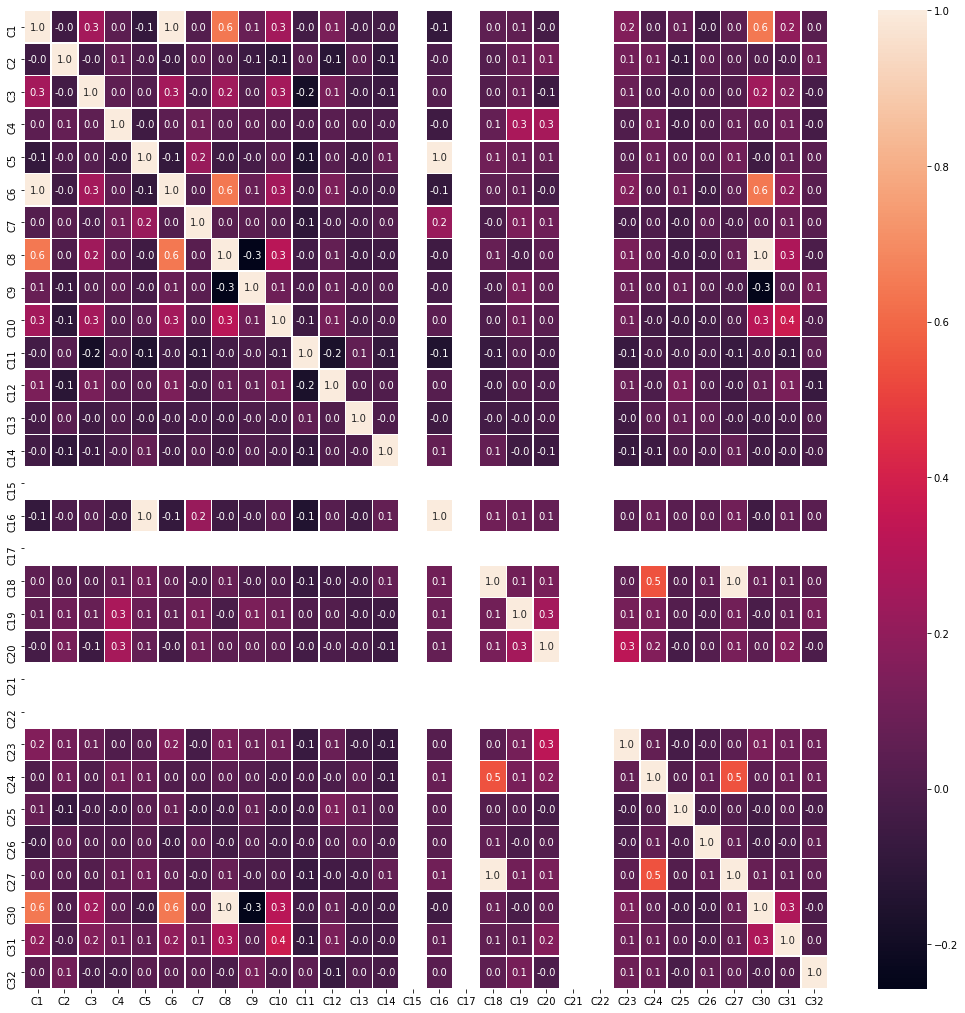

In [40]:
drop_list = ['ID','Class']
X = student_data.drop(drop_list,axis = 1)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#### ```Highly Correlated```
C8 = C30
C18 = C27
C16 = C5
C1 = C6

In [41]:
print(X.C15.unique())
print(X.C21.unique())
print(X.C22.unique())
print(X.C17.unique())

[1]
[0]
[0]
[0]


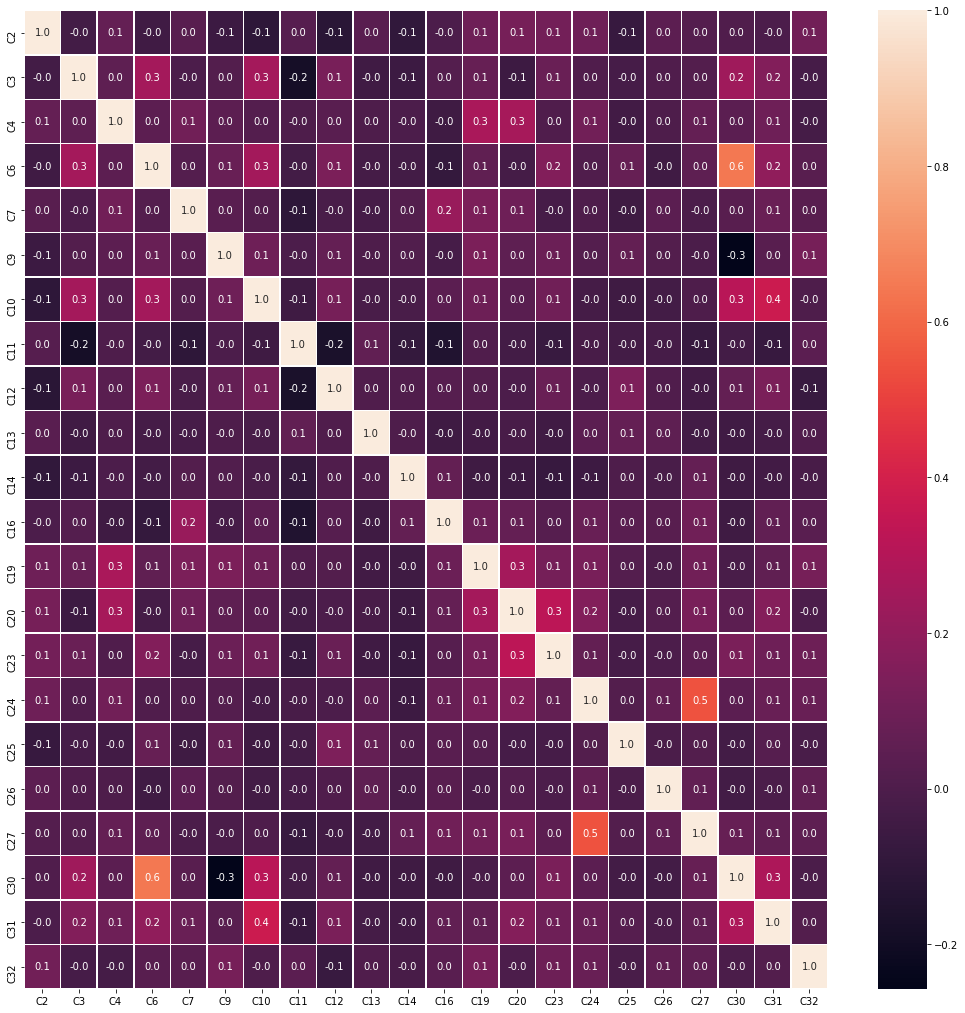

In [42]:
drop_list = ['C1','C5', 'C8', 'C18', 'C15', 'C17', 'C21', 'C22']
X = X.drop(drop_list,axis = 1 )
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);